In [58]:

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
from skimage import io
from os import listdir
from os.path import isfile, join
from find_maxima import find_maxima
import tifffile
import glob

from PIL import Image
import sys
sys.path.append('../src')
from convert_ROI_to_cell_volumes import *




In [ ]:
#import microscopeimagequality.miq
#microscopeimagequality.miq.download_model()

In [21]:
from microscopeimagequality import prediction
model_ckpt = "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/microscopeimagequality/data/model.ckpt-1000042"
ob = prediction.ImageQualityClassifier(model_ckpt,84,11)

INFO:root:Using model_id = 0.
INFO:tensorflow:Restoring parameters from /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/microscopeimagequality/data/model.ckpt-1000042
INFO:tensorflow:Restoring parameters from /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/microscopeimagequality/data/model.ckpt-1000042
INFO:root:Model restored from /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/microscopeimagequality/data/model.ckpt-1000042.


111
6


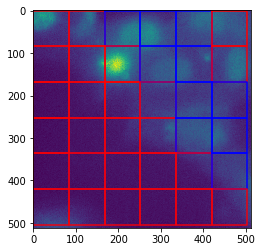

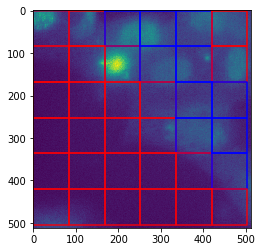

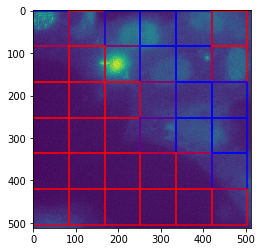

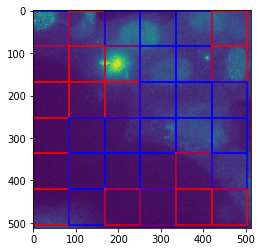

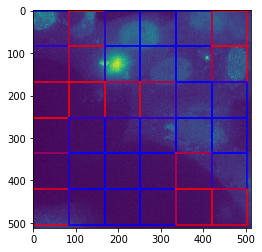

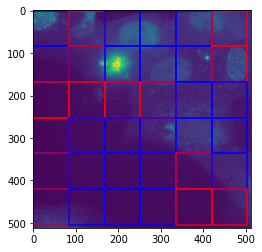

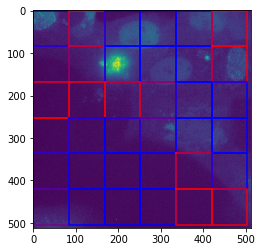

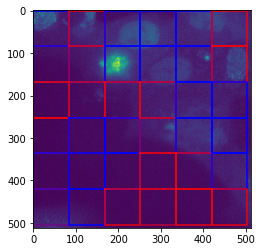

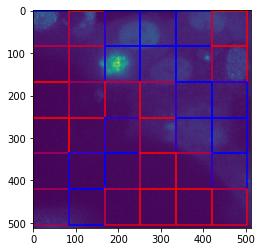

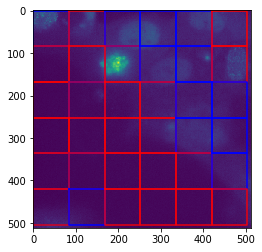

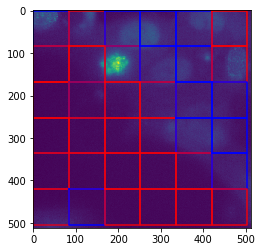

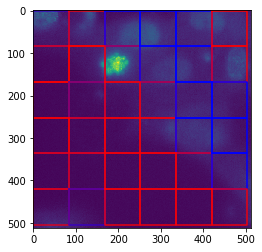

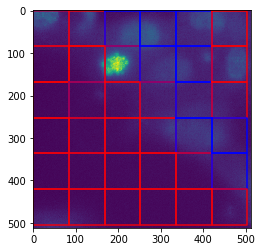

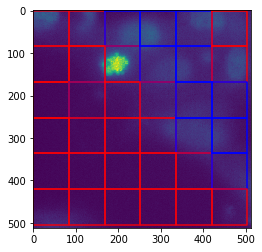

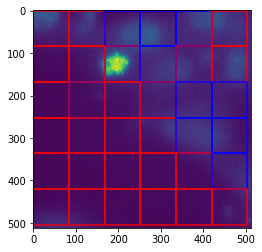

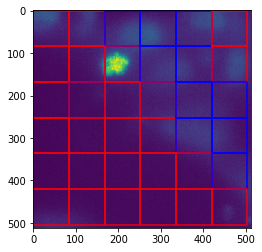

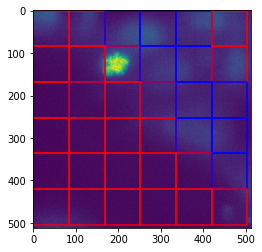

In [90]:
dataset_path = "/Volumes/Dominic/0012/"
output_path = "/Users/dominicwaithe/Desktop/focused/"
files_in_dir = [f for f in listdir(dataset_path) if isfile(join(dataset_path, f))]
ext = 'tif'
for file_ in files_in_dir[0:1]:
    file_ext = file_.split('.')[-1]
    if file_ != ".DS_Store" and file_ext == ext:
        
       
        stk_img = tifffile.TiffFile(dataset_path+file_).asarray()
        if stk_img.shape.__len__() == 3:
            min_err = 9999

            mint_t = []
            for i in range(0,stk_img.shape[0]):
                adj = 0
                raw_img = stk_img[i,adj:,adj:]
                results = ob.get_patch_predictions(raw_img)
                plt.figure()
                plt.imshow(raw_img)
                pred = 0
                for res in results:
                    opa = res[4].predictions
                    pred += opa
                    plt.plot([adj+res[0],adj+res[0],adj+res[0]+res[2],adj+res[0]+res[2],adj+res[0]],[adj+res[1],adj+res[1]+res[3],adj+res[1]+res[3],adj+res[1],adj+res[1]],'b-',alpha=(10-opa)/10.0)
                    plt.plot([adj+res[0],adj+res[0],adj+res[0]+res[2],adj+res[0]+res[2],adj+res[0]],[adj+res[1],adj+res[1]+res[3],adj+res[1]+res[3],adj+res[1],adj+res[1]],'r-',alpha=opa/10.0)
                if pred < min_err:
                    min_err = pred
                    min_i = i
            print(min_err)
            print(min_i)
            #tifffile.imsave(output_path+file_,stk_img[min_i,:,:])    


In [67]:
dataset_path+file_

'/Volumes/Dominic/0012/img_stk_x_-7330.1y_-1520.1t_0072.tif'